In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
SDSS_DR16 = 'SDSS_DR16_90cutoff_for_Vicky.csv'
df = pd.read_csv(SDSS_DR16)
df


,Unnamed: 0,specObjID,ra,dec,z,zErr,Types,d4000_n,sigmaStars,fracDeV_r,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z
0,0,2795715636188178432,162.87876,16.838215,0.022297,0.000007,elliptical,1.939160,128.97870,1.000000,17.35997,15.50984,14.68634,14.30167,14.01772
1,1,2840803871343798272,240.39499,11.850668,0.053161,0.000011,elliptical,1.944695,183.85820,0.935781,19.15590,17.14306,16.24167,15.81783,15.50098
2,2,2800218136303921152,164.66952,16.900165,0.068568,0.000009,spiral,1.282932,81.20707,0.420175,18.36842,17.18698,16.64672,16.31816,16.09746
3,3,2800232155077175296,164.85617,16.979098,0.083634,0.000019,spiral,1.565293,97.63731,0.170645,18.47494,17.25055,16.64057,16.32310,16.13419
4,4,2849703318459017216,245.52298,10.278617,0.128543,0.000025,spiral,1.453489,219.17930,0.478295,19.32188,17.80865,17.02585,16.56203,16.39108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525335,583519,2795713986920736768,162.43700,17.284938,0.056785,0.000006,spiral,1.123235,98.59753,0.000000,19.50647,17.86611,17.53326,17.20054,17.99106
525336,583520,2916209471627749376,155.78431,15.811398,0.145377,0.000023,elliptical,1.496544,148.20890,1.000000,20.09706,18.75447,17.76428,17.33186,17.03715
525337,583522,2920722966893324288,159.56049,16.508320,0.178770,0.000020,spiral,1.549078,91.99490,0.407970,19.59916,18.35870,17.55004,17.16154,17.01065
525338,583523,2792375044968310784,161.67263,16.703673,0.056509,0.000008,spiral,1.398121,83.41415,0.282227,19.66740,18.04996,17.17682,16.70945,16.39195


In [3]:
Types = df.loc[:, 'Types']
Types_ = np.array(Types)
types = Types.apply(lambda v: v.replace(
    'elliptical', '0').replace('spiral', '1')).astype(int)

X = np.array(df.loc[:, 'petroMag_u':'petroMag_z'])
y = np.array(types)

rs = np.array(df.loc[:, 'z'])
fd = np.array(df.loc[:, 'fracDeV_r'])


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
#randon_state ไว้กำหนดให้การ split ข้อมูลแต่ล่ะครั้ง ให้หน้าตาเหมือนเดิม ที่เป็น 42 เพราะว่ามีคนใช้แล้วใช้ตามกันเฉยๆ


In [5]:
# print(X_train.shape)
# print(X_test.shape)
# print(y_train.shape)
# print(y_test.shape)

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

C = 1000000000
gamma = 0.0001
'''
# RBF Kernel
svm_rbf = SVC(kernel='rbf', C=C, gamma=gamma)

svm_fit = svm_rbf.fit(X_train, y_train)
svm_fit
'''

SVC(C=1000000000, gamma=0.0001)

In [7]:
import pickle
'''
# save train-test data
svm_save = open('svm_fix_all.csv', 'wb')
pickle.dump(svm_fit, svm_save)
svm_save.close()
'''

In [8]:
# load data
svm_read = open('svm_fix_all.csv', 'rb')
svm = pickle.load(svm_read)
svm


SVC(C=1000000000, gamma=0.0001)

In [9]:
'''
train_ = svm.score(X_train, y_train)
test_ = svm.score(X_test, y_test)

y_pred_ = svm.predict(X_test)

y_score_ = svm.decision_function(X_test)
'''

In [10]:
'''
svm_var = [train_, test_, y_pred_, y_score_]
svm_var
'''

[0.8506059567771983,
 0.8472227509803175,
 array([0, 1, 0, ..., 0, 1, 1]),
 array([-6947.37498668, 19414.30122587,  -850.55351081, ...,
        -1381.77877155, 19631.23196647, 16780.59886548])]

In [11]:
'''
svm_save_var = open('svm_fix_all_var.csv', 'wb')
pickle.dump(svm_var, svm_save_var)
svm_save_var.close()
'''

In [12]:
svm_read_var = open('svm_fix_all_var.csv', 'rb')
svm_result = pickle.load(svm_read_var)
svm_result

[0.8506059567771983,
 0.8472227509803175,
 array([0, 1, 0, ..., 0, 1, 1]),
 array([-6947.37498668, 19414.30122587,  -850.55351081, ...,
        -1381.77877155, 19631.23196647, 16780.59886548])]

In [13]:
# 0, 1, 2, 3
train = svm_result[0]
test = svm_result[1]
y_pred = svm_result[2]
y_score = svm_result[3]

train, test, y_pred, y_score

(0.8506059567771983,
 0.8472227509803175,
 array([0, 1, 0, ..., 0, 1, 1]),
 array([-6947.37498668, 19414.30122587,  -850.55351081, ...,
        -1381.77877155, 19631.23196647, 16780.59886548]))

In [14]:
print("Train set accuracy = " + str(train))
print("Test set accuracy = " + str(test))

Train set accuracy = 0.8506059567771983
Test set accuracy = 0.8472227509803175


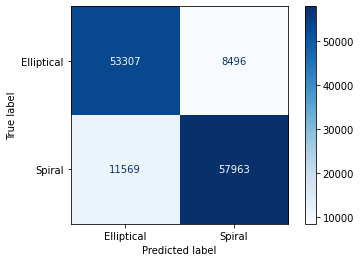

In [15]:
from sklearn.metrics import ConfusionMatrixDisplay

label_name = 'Elliptical', 'Spiral'

ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, cmap='Blues', display_labels=label_name)
    
plt.show()

In [16]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
tn, fp, fn, tp

(53307, 8496, 11569, 57963)

negative = elliptical

positive = spiral

In [17]:
X_test_tn = []
X_test_tp = []
X_test_fn = []
X_test_fp = []

for i in np.arange(0, len(y_test), 1):
    if y_test[i] == y_pred[i] == 0:
        # 0 = Elliptical = n
        X_test_tn += [X_test[i]]

    elif y_test[i] == y_pred[i] == 1:
        # 1 = Spiral = p
        X_test_tp += [X_test[i]]
        
    elif y_test[i] > y_pred[i]:
        # 1 > 0 = Spiral but pred Elliptical
        X_test_fn += [X_test[i]]
        
    elif y_test[i] < y_pred[i]:
        # 0 < 1 = Elliptical but pred Spiral
        X_test_fp += [X_test[i]]


In [18]:
X_test_tn = list(zip(*X_test_tn))
X_test_tp = list(zip(*X_test_tp))
X_test_fn = list(zip(*X_test_fn))
X_test_fp = list(zip(*X_test_fp))

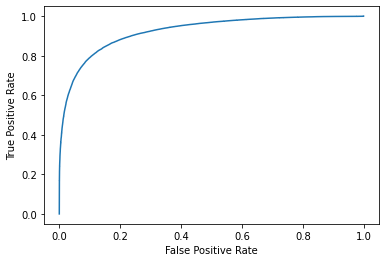

In [19]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=svm.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()


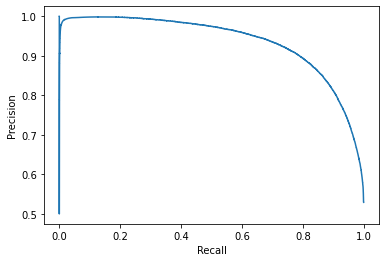

In [20]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

prec, recall, _ = precision_recall_curve(y_test, y_score, pos_label=svm.classes_[1])

pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()

In [21]:
from sklearn.inspection import permutation_importance
'''
feature_names = ['u', 'g', 'r', 'i', 'z']
features = np.array(feature_names)

perm_importance = permutation_importance(svm, X_test, y_test)
sorted_idx = perm_importance.importances_mean.argsort()
'''

In [34]:
'''
save_imp = open('svm_fix_all_perm_imp.csv', 'wb')
pickle.dump(perm_importance, save_imp)
save_imp.close()
'''

In [35]:
read_imp = open('svm_fix_all_perm_imp.csv', 'rb')
perm_imp = pickle.load(read_imp)
perm_imp

{'importances_mean': array([ 1.60204058e-01,  2.78583774e-01,  3.02810370e-01,  1.52221419e-01,
        -2.29946320e-04]),
 'importances_std': array([0.00104171, 0.00088749, 0.00081947, 0.00076921, 0.00023142]),
 'importances': array([[ 1.60201013e-01,  1.59538585e-01,  1.62211139e-01,
          1.59706095e-01,  1.59363460e-01],
        [ 2.79773099e-01,  2.77237599e-01,  2.79072601e-01,
          2.78874634e-01,  2.77960940e-01],
        [ 3.02501237e-01,  3.04359082e-01,  3.02805802e-01,
          3.01968249e-01,  3.02417482e-01],
        [ 1.52198576e-01,  1.51201127e-01,  1.52746793e-01,
          1.53348308e-01,  1.51612289e-01],
        [ 1.52282331e-04, -2.66494080e-04, -4.03548178e-04,
         -1.21825865e-04, -5.10145810e-04]])}

Text(0.5, 0, 'Importance Score')

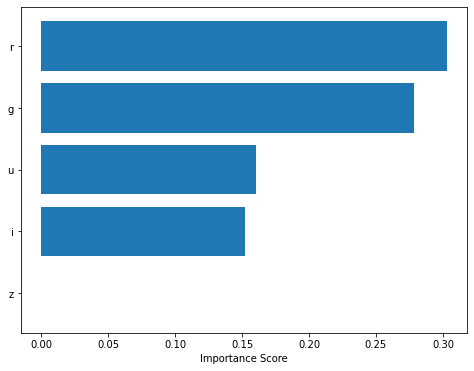

In [36]:
plt.figure(figsize=(8, 6), facecolor='none')

plt.barh(features[sorted_idx], perm_imp.importances_mean[sorted_idx])
plt.xlabel("Importance Score")


In [39]:
def tn_tp_fn_fp(xlim, xticks, xlabel, pos):
    plt.figure(figsize=(8, 6), facecolor='none')
    plt.gca(xlim=xlim, xticks = xticks)

    step = 0.05
    bins = np.arange(np.min(X_test), np.max(X_test) + step, step)

    plt.hist(X_test_tp[pos], bins=bins, alpha=0.5, label='tp')
    plt.hist(X_test_tn[pos], bins=bins, alpha=0.5, label='tn')
    plt.hist(X_test_fp[pos], bins=bins, alpha=0.5, label='fp')
    plt.hist(X_test_fn[pos], bins=bins, alpha=0.5, label='fn')

    plt.xlabel(str(xlabel), size=14)
    plt.ylabel('Number', size=14)
    plt.legend(loc='upper right')

    plt.tick_params(which='major', direction='in', length=5, labelsize='12')

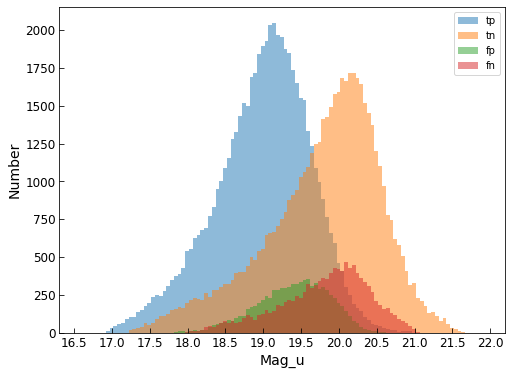

In [40]:
tn_tp_fn_fp([16.3, 22.2], np.arange(16.5, 22.5, 0.5), 'Mag_u', 0)

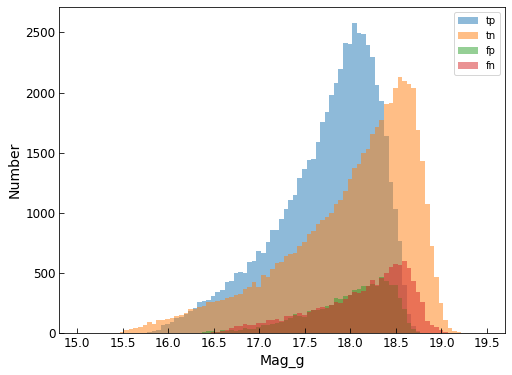

In [41]:
tn_tp_fn_fp([14.8, 19.7], np.arange(15, 20, 0.5), 'Mag_g', 1)

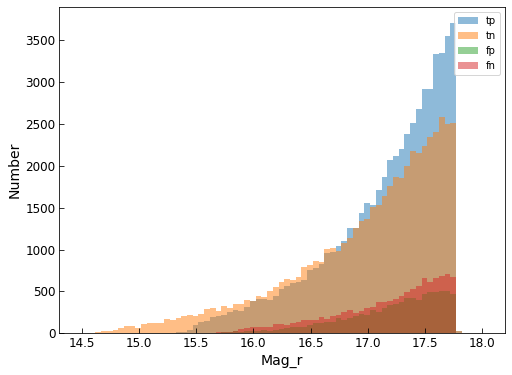

In [42]:
tn_tp_fn_fp([14.3, 18.2], np.arange(14.5, 18.5, 0.5), 'Mag_r', 2)

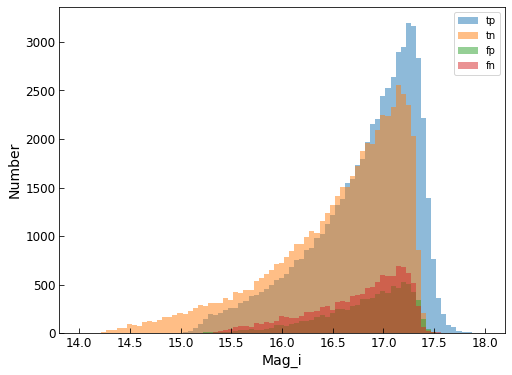

In [43]:
tn_tp_fn_fp([13.8, 18.2], np.arange(14, 18.5, 0.5), 'Mag_i', 3)

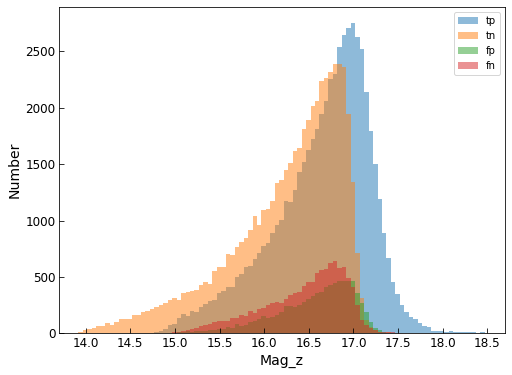

In [44]:
tn_tp_fn_fp([13.7, 18.7], np.arange(14, 19, 0.5), 'Mag_z', 4)